In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import gmaps

from api_keys import g_key
gmaps.configure(api_key=g_key)

In [172]:
objects='MetObjects (1).csv'
df=pd.read_csv(objects)
df

C:\Users\tiij8\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475796,46.46.581,False,False,False,853658,NaN,Drawings and Prints,1931,Print,"Poster advertising an exhibition of painting, ...",...,NaN,Prints,"© 2021 Artists Rights Society (ARS), New York",http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
475797,46.46.334,False,False,False,853659,NaN,Drawings and Prints,1931,Print,Poster advertising a cost free night course at...,...,NaN,Prints,"© 2021 Artists Rights Society (ARS), New York",http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
475798,46.46.499,False,False,False,853660,NaN,Drawings and Prints,1931,Print,Poster commemorating two dates: the liberation...,...,NaN,Prints,"© 2021 Artists Rights Society (ARS), New York",http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
475799,61.504.3,False,False,False,853663,NaN,Drawings and Prints,1961,Book,"Our Best Sellers, Supplement for Catalogs No. ...",...,NaN,Books,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [173]:
df.columns

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign',
       'Portfolio', 'Constituent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL'],
      dtype='object')

In [174]:
#filters data for most relevent columns
df=df[['Object Number',
 'Is Highlight',
 'Object ID',
 'Department',
 'AccessionYear',
 'Object Name',
 'Title',
 'Culture',
 'Period',
 'Dynasty',
 'Reign',
 'Artist Role',
 'Artist Display Name',
 'Artist Display Bio',
 'Artist Alpha Sort',
 'Artist Nationality',
 'Artist Begin Date',
 'Artist End Date',
 'Artist Gender',
 'Object Date',
 'Object Begin Date',
 'Object End Date',
 'Medium',
 'Dimensions',
 'Credit Line',
 'Geography Type',
 'City',
 'State',
 'County',
 'Country',
 'Region',
 'Subregion',
 'Locale',
 'Locus',
 'Excavation',
 'River',
 'Classification']]
df

,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,...,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification
0,1979.486.1,False,1,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980.264.5,False,2,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67.265.9,False,3,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67.265.10,False,4,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67.265.11,False,5,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475796,46.46.581,False,853658,Drawings and Prints,1931,Print,"Poster advertising an exhibition of painting, ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints
475797,46.46.334,False,853659,Drawings and Prints,1931,Print,Poster advertising a cost free night course at...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints
475798,46.46.499,False,853660,Drawings and Prints,1931,Print,Poster commemorating two dates: the liberation...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints
475799,61.504.3,False,853663,Drawings and Prints,1961,Book,"Our Best Sellers, Supplement for Catalogs No. ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Books


In [4]:
df['Classification'].describe()

count     401133
unique      1194
top       Prints
freq       80245
Name: Classification, dtype: object

In [5]:
# df['Classification'].value_counts().head(27)

In [6]:
# list(df['Classification'].unique())

In [7]:
#identifies all values in culture column
list(df['Culture'].unique())

[nan,
 'Mexican',
 'Guatemalan',
 'American',
 'British (American market)',
 'American or British',
 'Dutch',
 'American, Shaker',
 'British',
 'French',
 'Canadian',
 'American or French',
 'Chinese',
 'European',
 'Spanish',
 'Dutch, probably',
 'British, probably',
 'Chinese, for American market',
 'British, possibly',
 'American or Irish',
 'French, possibly',
 'American, Japanese',
 'Venezuelan',
 'British or Irish',
 'British or Flemish',
 'American, probably',
 'Bermudian, possibly',
 'Irish',
 'German',
 'Czech',
 'Chinese, for Swedish market',
 'Italian or German',
 'Bohemian',
 'British or Czech',
 'American or German',
 'European, probably',
 'Japanese',
 'Italian',
 'American, possibly',
 'British or American',
 'Italian, probably',
 'probably American',
 'Scottish',
 'French, probably',
 'European, probably British',
 'Chinese for export',
 'Japan',
 'American or Danish',
 'American or European',
 'Canadian (British)',
 'British (American Market)',
 'China',
 'Flemish',
 '

In [8]:
#filters for all entries under the egyptian culture
egypt=df['Culture']=='Egyptian'
egypt_df=df[egypt]
egypt_df

,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,...,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification
25297,36.25.2245,False,30516,Arms and Armor,1936,Flintlock pistol,Flintlock Pistol,Egyptian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Firearms-Pistols-Flintlock
71258,2003.79.11,False,87959,Costume Institute,2003,Scarf,Scarf,Egyptian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87873,2008.190.289,False,141731,Costume Institute,2008,Ring,Ring,Egyptian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92606,2009.300.4391,False,168606,Costume Institute,2009,Evening stole,Evening stole,Egyptian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92607,2009.300.4392,False,168607,Costume Institute,2009,Evening stole,Evening stole,Egyptian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365469,10.175.43,False,589695,Medieval Art,1910,Relief,Relie,Egyptian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"architecture, arch. elements and related"
461482,2018.913.5,False,812961,Medieval Art,2018,Textile,Wool Roundel with Mythological Animal,Egyptian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Textiles-Woven
461484,2018.913.6,False,812963,Medieval Art,2018,Textile,Textile with Diaper Pattern,Egyptian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Textiles-Woven
461485,2018.913.7,False,812964,Medieval Art,2018,Textile,Wool textile with Geometric Pattern,Egyptian,NaN,NaN,...,NaN,NaN,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,Textiles-Woven


In [9]:
#filters for the top 25 classifications of objects
top_ob_df=df[df['Classification'].isin(['Prints',
                                'Prints|Ephemera',
                                'Photographs',
                                'Drawings',
                                'Vases',
                                'Books'
                                'Ceramics',
                                'Textiles-Woven',
                                'Paintings',
                                'Photographs|Ephemera',
                                'Glass',
                                'Negatives',
                                'Prints|Ornament & Architecture',
                                'Textiles-Laces',
                                'Drawings|Ornament & Architecture',
                                'Ceramics-Porcelain',
                                'Sculpture',
                                'Textiles-Embroidered',
                                'Metalwork-Silver',
                                'Books|Prints|Ornament & Architecture',
                                'Ceramics-Pottery',
                                'Textile',
                                'Jewelry',
                                'Metalwork',
                                'Metal'])]
top_ob_df

,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,...,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification
18758,29.158.731,False,23345,Arms and Armor,1929,Relief sculpture,The Resurrection,British,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sculpture
21978,2003.521,False,26898,Arms and Armor,2003,Tintype photograph,Tintype Photograph of Gustave Young (1827–1895),"American, Springfield, Massachusetts",NaN,NaN,...,NaN,Massachusetts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Photographs
22324,"1977.415.1, .2",False,27282,Arms and Armor,1977,Two Photographs,Two Photographs of a French Embossed Armor,"British, Ashburnham, Sussex",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Photographs
22418,68.183,False,27388,Arms and Armor,1968,Chess piece,Chess Piece in the Form of a Knight,"Western European, possibly Germany or England",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sculpture
22419,68.95,False,27389,Arms and Armor,1968,Chess piece,Chess Piece in the Form of a Knight,"Western European, possibly England",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sculpture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475794,2020.36.7,False,853655,Drawings and Prints,2020,"Print, portfolio",Portfolio cover for Dance of Death,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints
475795,46.46.580,False,853657,Drawings and Prints,1931,Print,Poster advertising an exhibition of works by S...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints
475796,46.46.581,False,853658,Drawings and Prints,1931,Print,"Poster advertising an exhibition of painting, ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints
475797,46.46.334,False,853659,Drawings and Prints,1931,Print,Poster advertising a cost free night course at...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints


In [10]:
# highlight_df = df[df['Is Highlight'] == True]
# highlight_df

In [11]:
#removes all un confirmed culture types
top_ob_df=top_ob_df[top_ob_df["Culture"].str.contains("probably")==False]
top_ob_df=top_ob_df[top_ob_df["Culture"].str.contains("possibly")==False]
top_ob_df=top_ob_df[top_ob_df["Culture"].str.contains("unknown")==False]

In [12]:
#groups cultures by object type / Classification
cult_df=top_ob_df.groupby(['Culture','Classification']).count()\
                                                       .sort_values(['Object ID'], ascending=False)
cult_df.head(10)

Object Number  Is Highlight  Object ID  \
Culture         Classification                                             
Greek, Attic    Vases                     17186         17186      17186   
Japan           Prints                     4226          4226       4226   
                Textiles-Woven             3513          3513       3513   
Roman           Glass                      2097          2097       2097   
China           Paintings                  1949          1949       1949   
French          Textiles-Woven             1677          1677       1677   
Japan           Paintings                  1195          1195       1195   
Cypriot         Vases                       969           969        969   
Italian         Textiles-Laces              910           910        910   
British, London Metalwork-Silver            825           825        825   

                                  Department  AccessionYear  Object Name  \
Culture         Classification                                             
Greek, Attic    Vases                  17186          17164        17152   
Japan           Prints                  4226           4148         4226   
                Textiles-Woven          3513           3463         3513   
Roman           Glass                   2097           2068         2097   
China           Paintings               1949           1949         1949   
French          Textiles-Woven          1677           1648         1677   
Japan           Paintings               1195           1192         1195   
Cypriot         Vases                    969            969          969   
Italian         Textiles-Laces           910            904          910   
British, London Metalwork-Silver         825            824          825   

                                  Title  Period  Dynasty  Reign  ...  City  \
Culture         Classification                                   ...         
Greek, Attic    Vases             17186   17180        0      0  ...     0   
Japan           Prints             1543    3989        0      0  ...     0   
                Textiles-Woven        2    1375        0      0  ...     0   
Roman           Glass              2097    1962        0      0  ...     0   
China           Paintings          1259    1126        0      0  ...     0   
French          Textiles-Woven     1677       0        0      0  ...     0   
Japan           Paintings           527    1153        0      0  ...     0   
Cypriot         Vases               969     936        0      0  ...     0   
Italian         Textiles-Laces      910       0        0      0  ...     0   
British, London Metalwork-Silver    825       0        0      0  ...     0   

                                  State  County  Country  Region  Subregion  \
Culture         Classification                                                
Greek, Attic    Vases                 0       0        0       0          0   
Japan           Prints                0       0        0       0          0   
                Textiles-Woven        0       0        0       0          0   
Roman           Glass                 0       0        0       0          0   
China           Paintings             0       0        0       0          0   
French          Textiles-Woven        0       0        0       0          0   
Japan           Paintings             0       0        0       0          0   
Cypriot         Vases                 0       0        0       0          0   
Italian         Textiles-Laces        0       0        0       0          0   
British, London Metalwork-Silver      0       0        0       0          0   

                                  Locale  Locus  Excavation  River  
Culture         Classification                                      
Greek, Attic    Vases                  0      0           0      0  
Japan           Prints                 0      0           0      0  
                Textiles-Woven         0      

In [13]:
# finds the top ten objcet classifications
obj_chart_df=cult_df["Object ID"]
obj_chart_df=obj_chart_df[:10]
obj_chart_df

Culture          Classification  
Greek, Attic     Vases               17186
Japan            Prints               4226
                 Textiles-Woven       3513
Roman            Glass                2097
China            Paintings            1949
French           Textiles-Woven       1677
Japan            Paintings            1195
Cypriot          Vases                 969
Italian          Textiles-Laces        910
British, London  Metalwork-Silver      825
Name: Object ID, dtype: int64

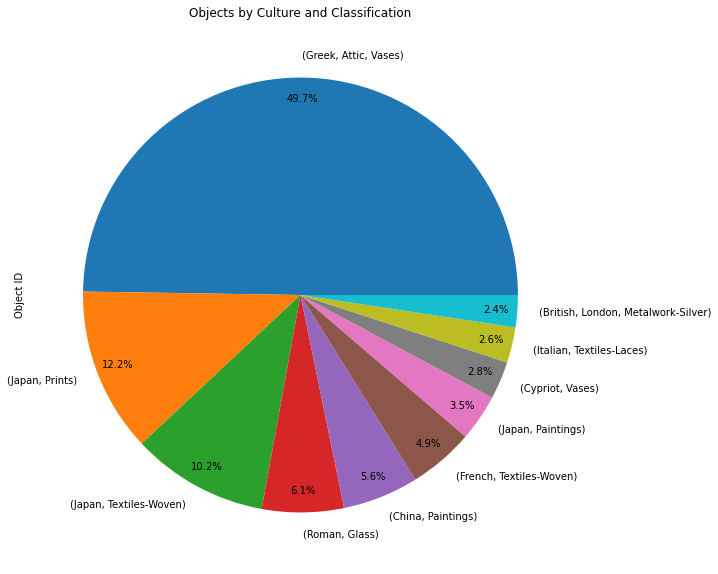

In [14]:
obj_chart_df.plot(kind='pie',autopct="%1.1f%%", figsize=(10,10),title='Objects by Culture and Classification',\
                  pctdistance=.9)
plt.savefig("Objects by Culture and Classification.png")

In [15]:
# removes us from data set
no_us_df=df[df["Country"].str.contains("United States")==False]
no_us_df

,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,...,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification
14,16.74.49,False,15,The American Wing,1916,Coin,"Coin, 1/2 Real",Mexican,NaN,NaN,...,NaN,NaN,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,16.74.27,False,16,The American Wing,1916,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,...,NaN,NaN,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,16.74.28,False,17,The American Wing,1916,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,...,NaN,NaN,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,16.74.29,False,18,The American Wing,1916,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,...,NaN,NaN,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,16.74.30,False,19,The American Wing,1916,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,...,NaN,NaN,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475740,23.75.42b,False,853430,Islamic Art,1923,Fragments,"Glazed Ceramic Fragments: Splashed, Opacified ...",NaN,NaN,NaN,...,NaN,NaN,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,Ceramics
475741,23.75.42c,False,853431,Islamic Art,1923,Fragments,"Glazed Ceramic Fragments: Splashed, Opacified ...",NaN,NaN,NaN,...,NaN,NaN,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,Ceramics
475742,NX456.5.S8 C37 1937,True,853475,The Libraries,NaN,NaN,La carte surrealiste : première série,NaN,NaN,NaN,...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475743,131.1M58 V42,True,853476,The Libraries,NaN,NaN,Orazione fvnerale di M. Benedetto Varchi fatta...,NaN,NaN,NaN,...,NaN,NaN,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#top 10 countrys represented by grouping countries by number of objects w/o us
country_grp=no_us_df.groupby('Country')
top_countries=country_grp.count().nlargest(10, 'Object ID')
top_countries

,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,...,City,State,County,Region,Subregion,Locale,Locus,Excavation,River,Classification
Country,,,,,,,,,,,,,,,,,,,,,
Egypt,31292,31292,31292,31292,30743,31250,31291,64,27720,23135,...,714,1140,0,19759,18653,15540,7330,15935,0,6773
Iran,6156,6156,6156,6156,6133,6156,6156,33,0,0,...,4553,75,8,20,1,0,0,0,0,6150
Peru,3396,3396,3396,3396,3390,3396,3396,3394,28,0,...,26,0,42,231,0,0,0,0,115,3382
France,1722,1722,1722,1722,1478,1629,1722,1450,0,0,...,813,10,474,66,0,0,0,0,0,1220
Byzantine Egypt,1673,1673,1673,1673,1642,1673,1673,1673,0,0,...,379,0,891,0,0,0,0,0,0,1673
Mexico,1537,1537,1537,1537,1532,1535,1537,1528,37,0,...,53,0,504,1179,0,0,0,0,187,1324
Indonesia,1390,1390,1390,1390,1390,1390,1390,1387,4,0,...,416,0,986,596,0,0,0,0,417,1390
India,1378,1378,1378,1378,1374,1378,1378,237,0,0,...,245,0,199,203,0,0,0,0,0,1374
England,1120,1120,1120,1120,1073,1097,1120,877,0,0,...,426,493,526,5,0,0,0,0,0,101


In [17]:
# finds all entries around the country of Egypt
no_us_df.loc[no_us_df['Country'].str.contains('Egypt'),'Country'] = 'Egypt'
no_us_df

C:\Users\tiij8\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,...,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification
14,16.74.49,False,15,The American Wing,1916,Coin,"Coin, 1/2 Real",Mexican,NaN,NaN,...,NaN,NaN,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,16.74.27,False,16,The American Wing,1916,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,...,NaN,NaN,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,16.74.28,False,17,The American Wing,1916,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,...,NaN,NaN,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,16.74.29,False,18,The American Wing,1916,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,...,NaN,NaN,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,16.74.30,False,19,The American Wing,1916,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,...,NaN,NaN,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475740,23.75.42b,False,853430,Islamic Art,1923,Fragments,"Glazed Ceramic Fragments: Splashed, Opacified ...",NaN,NaN,NaN,...,NaN,NaN,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,Ceramics
475741,23.75.42c,False,853431,Islamic Art,1923,Fragments,"Glazed Ceramic Fragments: Splashed, Opacified ...",NaN,NaN,NaN,...,NaN,NaN,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,Ceramics
475742,NX456.5.S8 C37 1937,True,853475,The Libraries,NaN,NaN,La carte surrealiste : première série,NaN,NaN,NaN,...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475743,131.1M58 V42,True,853476,The Libraries,NaN,NaN,Orazione fvnerale di M. Benedetto Varchi fatta...,NaN,NaN,NaN,...,NaN,NaN,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#grouping all countries by number of objects w/o us
country_df=no_us_df.groupby(['Country']).count()\
                                         .sort_values(['Object ID'], ascending=False)
country_df.head(10)

,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,...,City,State,County,Region,Subregion,Locale,Locus,Excavation,River,Classification
Country,,,,,,,,,,,,,,,,,,,,,
Egypt,33457,33457,33457,33457,32863,33415,33456,1749,27833,23205,...,1124,1271,905,19870,18703,15555,7331,15940,0,8840
Iran,6156,6156,6156,6156,6133,6156,6156,33,0,0,...,4553,75,8,20,1,0,0,0,0,6150
Peru,3396,3396,3396,3396,3390,3396,3396,3394,28,0,...,26,0,42,231,0,0,0,0,115,3382
France,1722,1722,1722,1722,1478,1629,1722,1450,0,0,...,813,10,474,66,0,0,0,0,0,1220
Mexico,1537,1537,1537,1537,1532,1535,1537,1528,37,0,...,53,0,504,1179,0,0,0,0,187,1324
Indonesia,1390,1390,1390,1390,1390,1390,1390,1387,4,0,...,416,0,986,596,0,0,0,0,417,1390
India,1378,1378,1378,1378,1374,1378,1378,237,0,0,...,245,0,199,203,0,0,0,0,0,1374
England,1120,1120,1120,1120,1073,1097,1120,877,0,0,...,426,493,526,5,0,0,0,0,0,101
China,917,917,917,917,914,915,917,858,26,0,...,28,1,18,4,0,0,0,0,0,207


In [19]:
country_chart_df=country_df["Object ID"]
country_chart_df=country_chart_df[:10]
country_chart_df

Country
Egypt        33457
Iran          6156
Peru          3396
France        1722
Mexico        1537
Indonesia     1390
India         1378
England       1120
China          917
Turkey         903
Name: Object ID, dtype: int64

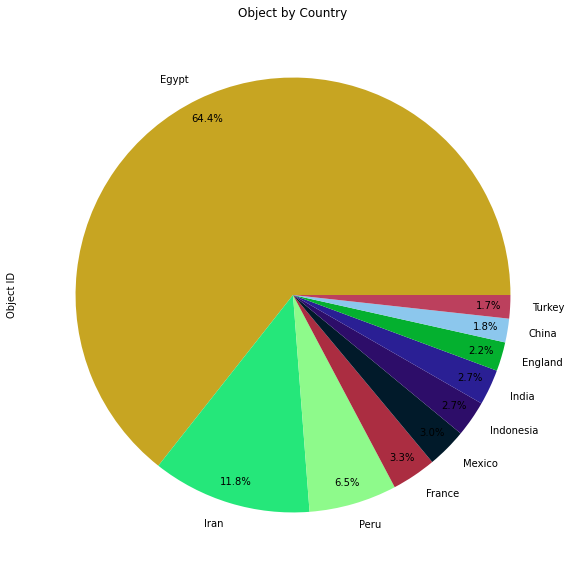

In [20]:
colors = np.random.rand(len(country_chart_df),3)
country_chart_df.plot(kind='pie',autopct="%1.1f%%", figsize=(10,10),\
                      title='Objects by Top 10 Countries',\
                      pctdistance=.9, colors=colors)
# plt.savefig("Objects by Top 10 Countries.png")

In [309]:
#heatmap df
country1_df=df.groupby(['Country']).count()\
                                         .sort_values(['Object ID'], ascending=False)
country1_df.head(10)

,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,...,City,State,County,Region,Subregion,Locale,Locus,Excavation,River,Classification
Country,,,,,,,,,,,,,,,,,,,,,
Egypt,31292,31292,31292,31292,30743,31250,31291,64,27720,23135,...,714,1140,0,19759,18653,15540,7330,15935,0,6773
United States,9070,9070,9070,9070,8979,9045,9070,8955,6,0,...,5822,291,1304,407,0,0,0,0,11,1259
Iran,6156,6156,6156,6156,6133,6156,6156,33,0,0,...,4553,75,8,20,1,0,0,0,0,6150
Peru,3396,3396,3396,3396,3390,3396,3396,3394,28,0,...,26,0,42,231,0,0,0,0,115,3382
France,1722,1722,1722,1722,1478,1629,1722,1450,0,0,...,813,10,474,66,0,0,0,0,0,1220
Byzantine Egypt,1673,1673,1673,1673,1642,1673,1673,1673,0,0,...,379,0,891,0,0,0,0,0,0,1673
Mexico,1537,1537,1537,1537,1532,1535,1537,1528,37,0,...,53,0,504,1179,0,0,0,0,187,1324
Indonesia,1390,1390,1390,1390,1390,1390,1390,1387,4,0,...,416,0,986,596,0,0,0,0,417,1390
India,1378,1378,1378,1378,1374,1378,1378,237,0,0,...,245,0,199,203,0,0,0,0,0,1374


In [311]:
# reads in lat long of countries from list provied by google
country_ll='country_lat_lng.csv'
country_ll_df=pd.read_csv(country_ll)
country_ll_df

,Abv,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [312]:
#merge lat lng dataframe to country_df for mapping
map_df = pd.merge(country1_df, country_ll_df, on="Country", how="left")
map_df

,Country,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,...,Region,Subregion,Locale,Locus,Excavation,River,Classification,Abv,latitude,longitude
0,Egypt,31292,31292,31292,31292,30743,31250,31291,64,27720,...,19759,18653,15540,7330,15935,0,6773,EG,26.820553,30.802498
1,United States,9070,9070,9070,9070,8979,9045,9070,8955,6,...,407,0,0,0,0,11,1259,US,37.090240,-95.712891
2,Iran,6156,6156,6156,6156,6133,6156,6156,33,0,...,20,1,0,0,0,0,6150,IR,32.427908,53.688046
3,Peru,3396,3396,3396,3396,3390,3396,3396,3394,28,...,231,0,0,0,0,115,3382,PE,-9.189967,-75.015152
4,France,1722,1722,1722,1722,1478,1629,1722,1450,0,...,66,0,0,0,0,0,1220,FR,46.227638,2.213749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,Myanmar (Burma) or Thailand,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,1,NaN,NaN,NaN
930,Myanmar (Burma),1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,1,NaN,NaN,NaN
931,Myanmar,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,1,NaN,NaN,NaN
932,Mozambique|Zimbabwe|Malawi,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,1,NaN,NaN,NaN


In [313]:
# drop na lat long for map_df
heatmap_df=map_df.dropna(subset=['latitude', 'longitude'])
heatmap_df

,Country,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,...,Region,Subregion,Locale,Locus,Excavation,River,Classification,Abv,latitude,longitude
0,Egypt,31292,31292,31292,31292,30743,31250,31291,64,27720,...,19759,18653,15540,7330,15935,0,6773,EG,26.820553,30.802498
1,United States,9070,9070,9070,9070,8979,9045,9070,8955,6,...,407,0,0,0,0,11,1259,US,37.090240,-95.712891
2,Iran,6156,6156,6156,6156,6133,6156,6156,33,0,...,20,1,0,0,0,0,6150,IR,32.427908,53.688046
3,Peru,3396,3396,3396,3396,3390,3396,3396,3394,28,...,231,0,0,0,0,115,3382,PE,-9.189967,-75.015152
4,France,1722,1722,1722,1722,1478,1629,1722,1450,0,...,66,0,0,0,0,0,1220,FR,46.227638,2.213749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,Lesotho,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,1,LS,-29.609988,28.233608
892,Jordan,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,1,JO,30.585164,36.238414
894,Kuwait,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,1,KW,29.311660,47.481766
897,Laos,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,1,LA,19.856270,102.495496


In [314]:
#heat map of objects per country
lat_lng=heatmap_df[['latitude','longitude']]
obj_vol=heatmap_df['Object ID']

fig=gmaps.figure(center=(50.0, -35.0), zoom_level=2
)
heat_layer=gmaps.heatmap_layer(lat_lng, weights=obj_vol,
                           dissipating=False,max_intensity=1000,
                           point_radius=2)
fig.add_layer(heat_layer)
# fig.save("heat map.png")
fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
# grouping country by classification
type_grp=df.groupby(['Country','Classification'])
type_grp_df=type_grp['Country'].count()#.nlargest(10, 'Object ID')
country_obj_typ_df=pd.DataFrame(type_grp_df)
country_obj_typ_df

Country
Country                         Classification                                            
Afghanistan                     Accessory-Foot and Leg wear                              2
                                Aerophone                                                2
                                Aerophone-Blow Hole-end-blown flute (vertical)           3
                                Aerophone-Blow Hole-side-blown flute (transverse)        1
                                Aerophone-Reed Vibrated-single reed conical              1
...                                                                                    ...
south central France            Enamels-Cloisonné                                        1
southern Germany or Switzerland Metalwork-Copper alloy                                   1
southern Italy                  Sculpture-Stone                                          1
the Iberian peninsula (Spain)   Metalwork-Bronze                                         1
the Netherlands                 Metalwork-Brass                                          1

[3888 rows x 1 columns]

In [270]:
#analyze objects from egypt
Egypt_obj=country_obj_typ_df['Country']['Egypt'].sort_values(ascending=False)
Egypt_obj=Egypt_obj[:10]
Egypt_obj

Classification
|                       3156
Textiles                1464
Ceramics                 684
Textiles-Woven           236
Wood                     231
Glass                    199
Sculpture                187
Textiles-Embroidered      80
Ivories and Bone          74
Jewelry                   73
Name: Country, dtype: int64

In [264]:
# looks at the years of aquisition w/o classification
unclass_egypt=no_us_df[no_us_df['Country']=='Egypt']
unclass_df=unclass_egypt[unclass_egypt['Classification']== '|']
unclass_df['AccessionYear'].value_counts().head(20)

1926.0    641
1910.0    566
1930.0    512
1927.0    250
1905.0    163
1923.0    113
1922.0    112
1904.0    103
1909.0     77
1920.0     58
1915.0     52
1917.0     48
1916.0     46
1889.0     38
1914.0     37
1903.0     28
1975.0     26
1948.0     25
1911.0     25
1902.0     21
Name: AccessionYear, dtype: int64

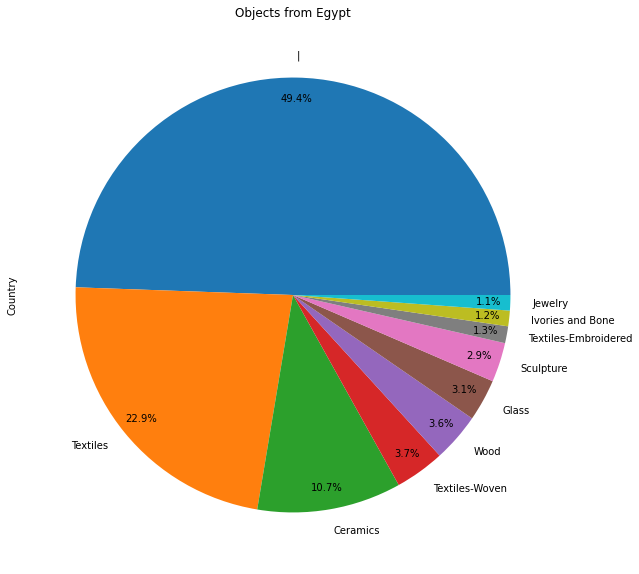

In [272]:
#pie chart of objects from egypt
colors = np.random.rand(len(Egypt_obj),3)
Egypt_obj.plot(kind='pie',autopct="%1.1f%%", figsize=(10,10),title='Objects from Egypt',pctdistance=.9,\
               )
# plt.savefig("Egypt.png")

In [28]:
#analyze objects from iran
Iran_obj=country_obj_typ_df['Country']['Iran'].sort_values(ascending=False)
Iran_obj=Iran_obj[:10]
Iran_obj

Classification
Stucco              1735
Ceramics            1577
Coins                537
Codices              519
Glass                258
Ivories and Bone     213
Metal                206
Ceramics-Tiles       174
Jewelry              146
Stone                131
Name: Country, dtype: int64

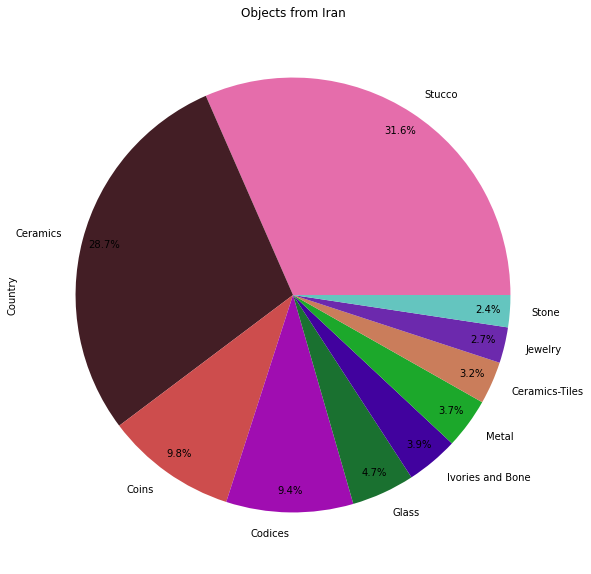

In [29]:
#pie chart objects from iran
colors = np.random.rand(len(Iran_obj),3)
Iran_obj.plot(kind='pie',autopct="%1.1f%%", figsize=(10,10),title='Objects from Iran',pctdistance=.9,\
              colors=colors)
# plt.savefig("Egypt.png")

In [150]:
# find top 20  donors by classification type
credit_obj_grp=df.groupby(['Credit Line','Classification'])
credit_obj_grp_df=credit_obj_grp['Credit Line'].count()#.nlargest(10, 'Object ID')
credit_obj_grp_df=pd.DataFrame(credit_obj_grp_df)
credit_obj_grp_df=credit_obj_grp_df['Credit Line'].sort_values()
credit_obj_grp_df=pd.DataFrame(credit_obj_grp_df)
credit_obj_grp_df= credit_obj_grp_df.rename(columns={credit_obj_grp_df.columns[0]: 'count'})
credit_obj_grp_df.sort_values(by=['count'], inplace=True, ascending=False)
credit_obj_grp_df=credit_obj_grp_df[:20]
credit_obj_grp_df

,,count
Credit Line,Classification,
"The Jefferson R. Burdick Collection, Gift of Jefferson R. Burdick",Prints|Ephemera,25346
"Gift of Dietrich von Bothmer, Distinguished Research Curator, Greek and Roman Art, 2011",Vases,16243
"The Jefferson R. Burdick Collection, Gift of Jefferson R. Burdick",Photographs|Ephemera,10017
"Walker Evans Archive, 1994",Negatives,5884
"The Elisha Whittelsey Collection, The Elisha Whittelsey Fund, 1959",Prints,3400
"Harris Brisbane Dick Fund, 1953",Prints,3275
"Gift of William Brewster, 1923",Drawings,3073
"The Elisha Whittelsey Collection, The Elisha Whittelsey Fund, 1951",Prints,3001
"Harris Brisbane Dick Fund, 1917",Prints,2410


<ipython-input-157-46665fb66e12>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


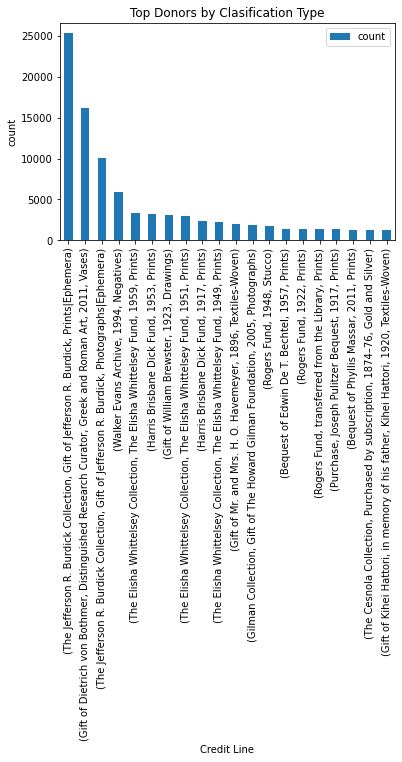

In [157]:
# bar chart for donors by classification
top_donor_chart=credit_obj_grp_df.plot(kind='bar', title="Top Donors by Clasification Type")
top_donor_chart.set_xlabel("Credit Line")
top_donor_chart.set_ylabel("count")
plt.tight_layout()
# plt.savefig('Top Donors by Clasification Type.png')
plt.show()
plt.close()

In [178]:
#top ten overall donors
credit_grp=df.groupby('Credit Line')
top_credit=credit_grp.count()#.nlargest(10, 'Object ID')
top_credit

,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,...,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification
Credit Line,,,,,,,,,,,,,,,,,,,,,
\r\n,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"\r\nBequest of John M. Crawford Jr., 1988",1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
"\r\nGift of Mr. and Mrs. Peter H. B. Frelinghuysen, 1991",1,1,1,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
"\r\nHarris Brisbane Dick Fund, 1927",1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
".Fund, 1948",1,1,1,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"man's armor: Bashford Dean Memorial Collection, Gift of Mrs. Bashford Dean, 1929; mail sleeves: Bashford Dean Memorial Collection, Funds from various donors, 1929; horse armor: Rogers Fund, 1932",1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
"man's armor: Gift of William H. Riggs, 1913; horse armor, bit, rear plate of saddle: Fletcher Fund, 1921; part of a greave: Rogers Fund, 1984",1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
"man’s armor: Gift of Dr. George M. Lefferts, 1910; horse trappings: Gift of Bashford Dean, 1914; helmet crest, foot defenses, horse bit, saddle, and sword: Bequest of George C. Stone, 1935; scabbard cover: Gift of Harald de Raasloff, 1915; dagger: H. O. Havemeyer Collection, Bequest of Mrs. H. O. Havemeyer, 1929",1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
credit_grp=df.groupby('Credit Line')
credit=credit_grp.count()#.nlargest(10, 'Object ID')
credit2=credit[credit['Object ID'].between (1000,7500)]
credit2

,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,...,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification
Credit Line,,,,,,,,,,,,,,,,,,,,,
"Bequest of Edwin De T. Bechtel, 1957",1446,1446,1446,1446,1445,1446,1446,0,0,0,...,0,0,0,0,0,0,0,0,0,1446
"Bequest of George C. Stone, 1935",3016,3016,3016,3016,3016,3016,3016,3015,0,0,...,0,492,0,0,0,0,0,0,0,3016
"Bequest of Phyllis Massar, 2011",1686,1686,1686,1686,1686,1686,1679,6,0,0,...,0,0,0,0,0,0,0,0,0,1686
"Bequest of W. Gedney Beatty, 1941",1406,1406,1406,1406,1406,1406,1385,722,364,39,...,2,0,77,160,6,0,0,0,0,1316
"Edward C. Moore Collection, Bequest of Edward C. Moore, 1891",2045,2045,2045,2045,2045,2045,1415,1621,1300,2,...,5,7,394,23,0,0,0,0,0,2043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"The Elisha Whittelsey Collection, The Elisha Whittelsey Fund, 1960",1348,1348,1348,1348,1345,1348,1348,0,1,0,...,0,0,0,0,0,0,0,0,0,1348
"The Elisha Whittelsey Collection, The Elisha Whittelsey Fund, 1962",1094,1094,1094,1094,1090,1094,1094,0,0,0,...,0,0,0,0,0,0,0,0,0,1093
"The Elisha Whittelsey Collection, The Elisha Whittelsey Fund, 1966",1004,1004,1004,1004,1002,1004,1004,0,0,0,...,0,0,0,0,0,0,0,0,0,1004


In [70]:
credit_grp=df.groupby('Credit Line')
credit=credit_grp.count()#.nlargest(10, 'Object ID')
credit=credit[credit['Object ID']>= 1000]
credit

,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,...,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification
Credit Line,,,,,,,,,,,,,,,,,,,,,
"Bequest of Edwin De T. Bechtel, 1957",1446,1446,1446,1446,1445,1446,1446,0,0,0,...,0,0,0,0,0,0,0,0,0,1446
"Bequest of George C. Stone, 1935",3016,3016,3016,3016,3016,3016,3016,3015,0,0,...,0,492,0,0,0,0,0,0,0,3016
"Bequest of Phyllis Massar, 2011",1686,1686,1686,1686,1686,1686,1679,6,0,0,...,0,0,0,0,0,0,0,0,0,1686
"Bequest of W. Gedney Beatty, 1941",1406,1406,1406,1406,1406,1406,1385,722,364,39,...,2,0,77,160,6,0,0,0,0,1316
"Edward C. Moore Collection, Bequest of Edward C. Moore, 1891",2045,2045,2045,2045,2045,2045,1415,1621,1300,2,...,5,7,394,23,0,0,0,0,0,2043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"The Elisha Whittelsey Collection, The Elisha Whittelsey Fund, 1966",1004,1004,1004,1004,1002,1004,1004,0,0,0,...,0,0,0,0,0,0,0,0,0,1004
"The Jefferson R. Burdick Collection, Gift of Jefferson R. Burdick",37002,37002,37002,37002,37002,37002,37002,0,0,0,...,0,0,0,0,0,0,0,0,0,37002
"The Michael C. Rockefeller Memorial Collection, Bequest of Nelson A. Rockefeller, 1979",1667,1667,1667,1667,1667,1667,1667,1667,0,0,...,0,374,1667,522,0,0,0,0,359,1667


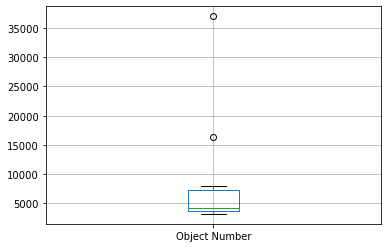

In [158]:
#boxplot for top ten donors and volume givin
boxplot = top_credit.boxplot(column=['Object Number'])

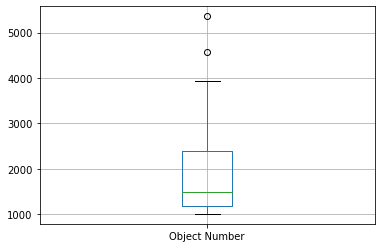

In [72]:
# All donors between 1000 and 7500 objects
boxplot = credit2.boxplot(column=['Object Number'])

In [273]:
credit_grp=df.groupby('Credit Line')
credit=credit_grp.count()#.nlargest(10, 'Object ID')
credit3=credit[credit['Object ID'].between (1000,4000)]
credit3

,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,...,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification
Credit Line,,,,,,,,,,,,,,,,,,,,,
"Bequest of Edwin De T. Bechtel, 1957",1446,1446,1446,1446,1445,1446,1446,0,0,0,...,0,0,0,0,0,0,0,0,0,1446
"Bequest of George C. Stone, 1935",3016,3016,3016,3016,3016,3016,3016,3015,0,0,...,0,492,0,0,0,0,0,0,0,3016
"Bequest of Phyllis Massar, 2011",1686,1686,1686,1686,1686,1686,1679,6,0,0,...,0,0,0,0,0,0,0,0,0,1686
"Bequest of W. Gedney Beatty, 1941",1406,1406,1406,1406,1406,1406,1385,722,364,39,...,2,0,77,160,6,0,0,0,0,1316
"Edward C. Moore Collection, Bequest of Edward C. Moore, 1891",2045,2045,2045,2045,2045,2045,1415,1621,1300,2,...,5,7,394,23,0,0,0,0,0,2043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"The Elisha Whittelsey Collection, The Elisha Whittelsey Fund, 1960",1348,1348,1348,1348,1345,1348,1348,0,1,0,...,0,0,0,0,0,0,0,0,0,1348
"The Elisha Whittelsey Collection, The Elisha Whittelsey Fund, 1962",1094,1094,1094,1094,1090,1094,1094,0,0,0,...,0,0,0,0,0,0,0,0,0,1093
"The Elisha Whittelsey Collection, The Elisha Whittelsey Fund, 1966",1004,1004,1004,1004,1002,1004,1004,0,0,0,...,0,0,0,0,0,0,0,0,0,1004


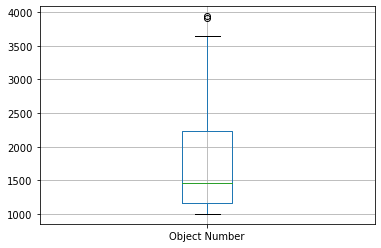

In [274]:
boxplot = credit3.boxplot(column=['Object Number'])

In [43]:
#top ten types of objects
objects_grp=df.groupby('Classification')
top_objects=objects_grp.count().nlargest(10, 'Object ID')
top_objects

,Object Number,Is Highlight,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,...,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River
Classification,,,,,,,,,,,,,,,,,,,,,
Prints,80245,80245,80245,80245,78520,80027,77020,4809,4338,0,...,2432,0,0,3,0,0,0,0,0,0
Prints|Ephemera,28271,28271,28271,28271,28264,28270,28271,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Photographs,26847,26847,26847,26847,26656,26619,26822,41,3,0,...,20,0,6,51,2,0,0,0,0,1
Drawings,22631,22631,22631,22631,22594,22601,22628,93,2,0,...,9,0,0,19,0,0,0,0,0,0
Vases,21312,21312,21312,21312,21272,21278,21312,21265,20625,0,...,0,0,0,0,0,0,0,0,0,0
Books,14694,14694,14694,14694,14639,14678,14694,0,0,0,...,4971,0,0,0,0,0,0,0,0,0
Textiles-Woven,10999,10999,10999,10999,10874,10999,6779,9339,1802,0,...,286,1,236,2053,455,9,0,0,0,185
Ceramics,10980,10980,10980,10980,10936,10918,5461,7488,5822,0,...,2329,160,598,4346,76,20,0,0,0,0
Photographs|Ephemera,10019,10019,10019,10019,10019,10019,10019,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
chart_top_objects=top_objects["Object ID"]
chart_top_objects

Classification
Prints                  80245
Prints|Ephemera         28271
Photographs             26847
Drawings                22631
Vases                   21312
Books                   14694
Textiles-Woven          10999
Ceramics                10980
Photographs|Ephemera    10019
Paintings                8537
Name: Object ID, dtype: int64

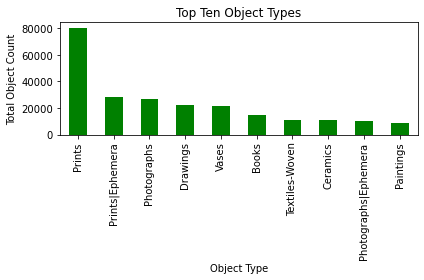

In [303]:
# bar chart fortop ten objet types
top_donor_chart=chart_top_objects.plot(kind='bar', title="Top Ten Object Types", color='g')
top_donor_chart.set_xlabel("Object Type")
top_donor_chart.set_ylabel("Total Object Count")
plt.tight_layout()
plt.savefig('Top Ten Object Types.png')
plt.show()
plt.close()

In [37]:
all_credit_grp=df.groupby('Credit Line')
all_credit=all_credit_grp["Object ID"].count()
all_credit

Credit Line
\r\n                                                                                                                                                                                                                                                                                                                         1
\r\nBequest of John M. Crawford Jr., 1988                                                                                                                                                                                                                                                                                    1
\r\nGift of Mr. and Mrs. Peter H. B. Frelinghuysen, 1991                                                                                                                                                                                                                                                                     1
\r\nHarris Brisbane Dick Fund, 

In [38]:
all_credit.describe()

count    35124.000000
mean        13.534563
std        241.914481
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max      37002.000000
Name: Object ID, dtype: float64

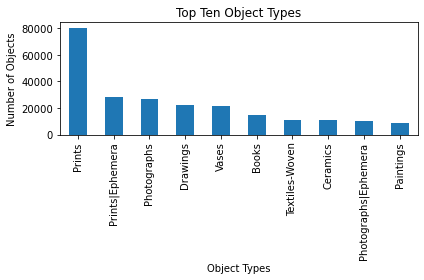

In [47]:
# #Chart top ten object types by number of objects
# top_obj_chart=chart_top_objects.plot(kind='bar', title="Top Ten Object Types")
# top_obj_chart.set_xlabel("Object Types")
# top_obj_chart.set_ylabel("Number of Objects")

# plt.tight_layout()
# # plt.savefig('Top Ten Object Types.png')
# plt.show()
# plt.close()

In [34]:
# what top donor gave
jeff_obj=credit_obj_grp_df['Credit Line']['The Jefferson R. Burdick Collection, Gift of Jefferson R. Burdick']
jeff_obj

Classification
Books                                   1
Ephemera                                1
Ephemera|Photographs                  375
Ephemera|Prints                        50
Faience-Cylinder Seals|Ephemera         1
Miscellaneous|Ephemera                  2
Paintings|Metalwork-Tin|Ephemera        2
Photographs                           949
Photographs|Ephemera                10017
Posters|Ephemera                        1
Prints|Engravings                       4
Prints|Ephemera                     25346
Prints|Ephemera|Postcards              15
Prints|Metal|Ephemera                 235
Textiles-Painted|Ephemera               3
Name: Credit Line, dtype: int64

In [40]:
jeff_collect=round(25599/37002*100,2)
print(jeff_collect)

69.18


In [297]:
#calculate years object has been in the museum
calc_df=df
calc_df = calc_df[calc_df.AccessionYear != '2020-03-23']
clean_df = calc_df[calc_df.AccessionYear != '2005-02-15']
# calc_df['AccessionYear'].unique()
calc_df=clean_df.dropna(subset=['AccessionYear'])
calc_df['years in muse']= 2021 - calc_df['AccessionYear'].astype(int)
print(calc_df['years in muse'].describe())
print(calc_df['years in muse'].median())
calc_df['AccessionYear'].mode()

count    471375.000000
mean         65.492935
std          35.517259
min           0.000000
25%          39.000000
50%          63.000000
75%          94.000000
max         151.000000
Name: years in muse, dtype: float64
63.0


<ipython-input-297-5acce5beb300>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calc_df['years in muse']= 2021 - calc_df['AccessionYear'].astype(int)


0    1963
dtype: object

In [291]:
df['Object End Date']

0         1853
1         1901
2         1927
3         1927
4         1927
          ... 
475796    1950
475797    1945
475798    1938
475799    1961
475800    1961
Name: Object End Date, Length: 475801, dtype: int64

In [296]:
calc2_df=df
# calc2_df = calc2_df[calc_df.AccessionYear != '2020-03-23']
# clean2_df = calc2_df[calc_df.AccessionYear != '2005-02-15']
# calc_df['AccessionYear'].unique()
calc2_df=clean_df.dropna(subset=['Object End Date'])
calc2_df['object age']= 2021 - calc_df['Object End Date'].astype(int)
print(calc2_df['object age'].mean())
print(calc2_df['object age'].median())


626.099364624768
186.0


In [275]:
# count of countries in data set
df['Country'].nunique()

934

In [276]:
#count of uniques objects
df['Object ID'].nunique()

475801

In [284]:
avg_obj=no_us_df.groupby(['Country'])
avg_obj_df=credit_obj_grp['Object ID'].count().median()
# avg_obj=no_us_df['Country'].groupby('Object ID')
avg_obj_df

1.0

In [288]:
# Calculate the total number of countries
total_country = len(no_us_df["Country"].unique())

# Calculate the total number of objects
total_objects = len(no_us_df["Object ID"].unique())
object_per_country = total_objects/total_country
object_per_country



76.74767441860465

In [ ]:
print(calc_df['years in muse'].describe())

In [298]:
#Data Set Summary

# Calculate the total number of countries
total_country = len(no_us_df["Country"].unique())

# Calculate the total number of objects
total_objects = len(no_us_df["Object ID"].unique())

# Calculate the total number object types
total_object_types = len(no_us_df["Classification"].unique())

# Calculate the average number objects per country
object_per_country = total_objects/total_country

# Calculate the average age of objects
object_avg_age = calc2_df["object age"].mean()

# Calculate the median age of objects
object_med_age = calc2_df["object age"].median()

# Calculate the average number of years objects at The Met
avg_years_at_met = calc_df["years in muse"].mean()

# Calculate the median number of years objects at The Met
med_years_at_met = calc_df["years in muse"].median()

# Create a dataframe to hold the above results
summary_df =  pd.DataFrame({"Total Countries":[total_country],
                                 "Total Objects":[total_objects],
                                  "Total Object Types":[total_object_types],
                                  "Avg Number Objects per Country":[object_per_country],                                  
                                  "Avg Age of Objects":[object_avg_age],
                                  "Median Age of Objects":[object_med_age],  
                                  "Avg Years Object at Met":[avg_years_at_met],
                                  "Median Years Object at Met":[med_years_at_met],
                                 })

# Give the displayed data cleaner formatting
summary_df['Total Countries'] = summary_df['Total Countries'].map("{:,}".format)
summary_df['Total Objects'] = summary_df['Total Objects'].map("{:,}".format)
summary_df['Total Object Types'] = summary_df['Total Object Types'].map("{:,}".format)
summary_df['Avg Number Objects per Country'] = summary_df['Avg Number Objects per Country'].map("{:,.2f}".format)
summary_df['Avg Age of Objects'] = summary_df['Avg Age of Objects'].map("{:,.2f}".format)
summary_df['Median Age of Objects'] = summary_df['Median Age of Objects'].map("{:,.2f}".format)
summary_df['Avg Years Object at Met'] = summary_df['Avg Years Object at Met'].map("{:,.2f}".format)
summary_df['Median Years Object at Met'] = summary_df['Median Years Object at Met'].map("{:,.2f}".format)

summary_df

,Total Countries,Total Objects,Total Object Types,Avg Number Objects per Country,Avg Age of Objects,Median Age of Objects,Avg Years Object at Met,Median Years Object at Met
0,860,"66,003",421,76.75,626.10,186.00,65.49,63.00


In [301]:
no_us_df['Credit Line'].nunique()

4302